In [1]:

#import tabula
import pandas as pd
from datetime import datetime 
import numpy as np
import matplotlib.pyplot as plt
#import pyEX as p
from matplotlib import pyplot
import re


In [2]:
#!pip install pyEX

Tabula


In [ ]:
tables = tabula.read_pdf('MCB PSX Fund.pdf', pages = "all")
columns = tables[0].columns
columns

print([len(table.columns) for table in tables])

In [ ]:

for table in tables[:-1]:
    if(len(table.columns==13)):
        first = table.columns
        table.columns = columns
        table.loc[-1] = first
        table.index = table.index+1
        table.sort_index()
        df = pd.concat([df,table])
    #print(table.iloc[0])


len(df)

NameError: name 'df' is not defined

In [ ]:
#df.to_csv('Fund_data2.csv',index=False)

In [ ]:
#df.to_csv('Fund_data.csv',index=False)
df = pd.read_csv('Fund_data2.csv')

In [ ]:
df.head()

,Fund Name,Category,Inception Date,Class,Type,Offer,Repurchase,NAV,Validity Date,Front-end\rLoad %,Back-end\rLoad %,Contingent\rLoad %,Trustee Code
0,HBL Islamic Equity Fund,Shariah Compliant\rEquity,"May 29, 2014",-,-,0.0,0.0,100.0000,2014-05-27,-,-,-,CDC
1,HBL Islamic Equity Fund,Shariah Compliant\rEquity,"May 29, 2014",-,-,103.0483,100.0469,100.0469,2014-05-29,-,-,-,CDC
2,HBL Islamic Equity Fund,Shariah Compliant\rEquity,"May 29, 2014",-,-,103.0109,100.0106,100.0106,2014-05-30,-,-,-,CDC
3,HBL Islamic Equity Fund,Shariah Compliant\rEquity,"May 29, 2014",-,-,103.2838,100.2755,100.2755,2014-06-02,-,-,-,CDC
4,HBL Islamic Equity Fund,Shariah Compliant\rEquity,"May 29, 2014",-,-,102.8178,99.8231,99.8231,2014-06-03,-,-,-,CDC


In [ ]:
#df = pd.read_csv('Fund_data.csv')
df = df[df['NAV']!='NAV']

C:\Users\Arslan Shahid\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [ ]:
df.groupby('Fund Name')['Fund Name'].head(1)

0                                  HBL Islamic Equity Fund
1456                                Alfalah GHP Stock Fund
4032                        Alfalah GHP Islamic Stock Fund
6503                               AKD Islamic Income Fund
7115                                AKD Islamic Stock Fund
7727      ABL Financial Planning Fund\r(Conservative Plan)
8833                              UBL Stock Advantage Fund
11479                                       HBL Stock Fund
14003    Alfalah GHP Prosperity Planning Fund\r(Alfalah...
15200                                 AKD Opportunity Fund
18365            Faysal Financial Sector Opportunity\rFund
20140                       MCB Pakistan Stock Market Fund
Name: Fund Name, dtype: object

In [ ]:
#df['Validity Date'] = pd.Series([str(x) for x in df['Validity Date']])
#df = df[df['Validity Date']!= 'nan']
invalid =[]
def date(x):
    try:
        y = datetime.strptime(x,'%b %d, %Y') 
        if(y != np.nan):
            return  datetime.strptime(x,'%b %d, %Y') 
        return x
    except:
        invalid.append(x)
        return x
def numeric(x):
    try:
        if(float(x)<1000):
            return False
        else:
            return True
    except:
        return True
df['Validity Date'] = df['Validity Date'].apply(date)
df[df['Validity Date']=='NULL']
df = df[df['Validity Date'].apply(numeric)]
df[df['Validity Date']==101.0168]

,Fund Name,Category,Inception Date,Class,Type,Offer,Repurchase,NAV,Validity Date,Front-end\rLoad %,Back-end\rLoad %,Contingent\rLoad %,Trustee Code


In [ ]:
#display(invalid)

In [ ]:
df.groupby(['Fund Name']).describe()
df = df[df['Fund Name']!='ABL Asset Management Company Limited']
df = df[df['Fund Name']!='Alfalah GHP Investment Management Limited']
df = df[df['Fund Name']!='AKD Investment Management Limited']
df = df[df['Fund Name']!='HBL Asset Management Limited']
df = df[df['Fund Name']!='UBL Fund Managers Limited']
df =df[df['Fund Name']!='Fund Name']
df =df[df['Fund Name']!='Alfalah GHP Prosperity Planning Fund']
df =df[df['Fund Name']!='MCB-Arif Habib Savings and Investments Limited']
df =df[df['Fund Name']!='Faysal Asset Management Limited']

In [ ]:
def replace(x):
    try:
        x = float(x)
        return x
    except:
        x = x[:-2]
        return float(x)

#df[df['NAV']== '122.8311.1'] =122.8311
df['NAV'] = df['NAV'].apply(replace)
df.drop_duplicates( 
                     keep = False, inplace = True) 
df= df[df['NAV']!=0]

In [ ]:
price_data = df.groupby('Fund Name')
#price_data.get_group('HBL Stock Fund')["NAV"]
bins = np.linspace(-100, 1000, 618)
# print(len(price_data.get_group('AKD Islamic Income Fund')["NAV"]),len(price_data.get_group('AKD Islamic Income Fund')["Validity Date"]))
# pyplot.plot(bins, price_data.get_group('AKD Islamic Income Fund')["NAV"], alpha=0.5, label='x')
# # pyplot.plot(price_data.get_group('AKD Islamic Income Fund')["Validity Date"], bins, alpha=1, label='y')
# pyplot.legend(loc='upper right')
# pyplot.show()
t = df.groupby('Fund Name')['Fund Name'].head(1)
i = [t.iloc[x] for x in range(len(t))]
# price_data.get_group('HBL Islamic Equity Fund').plot(x='Validity Date',y='NAV',figsize=(10,10))
# plt.show()


In [ ]:
#df.to_csv('Fund_data2.csv',index=False)

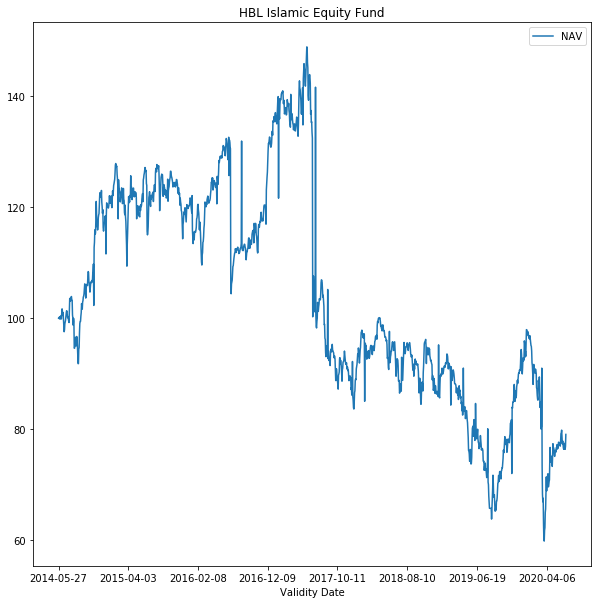

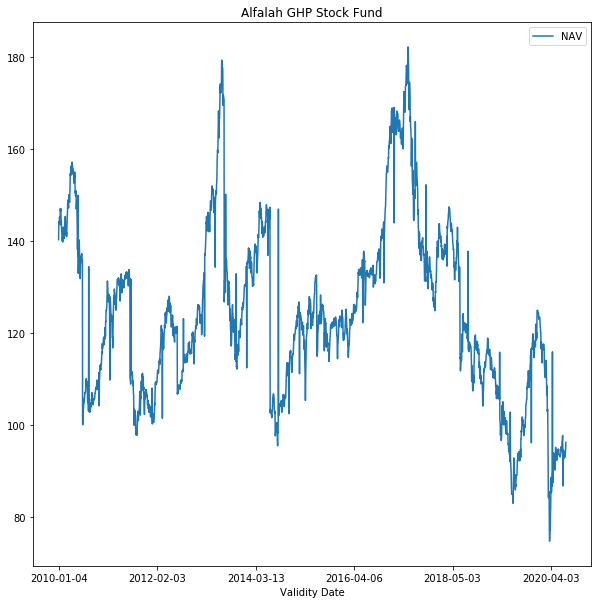

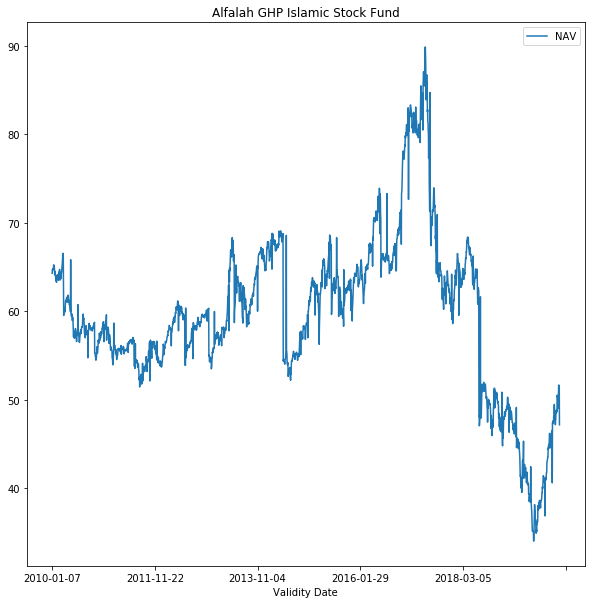

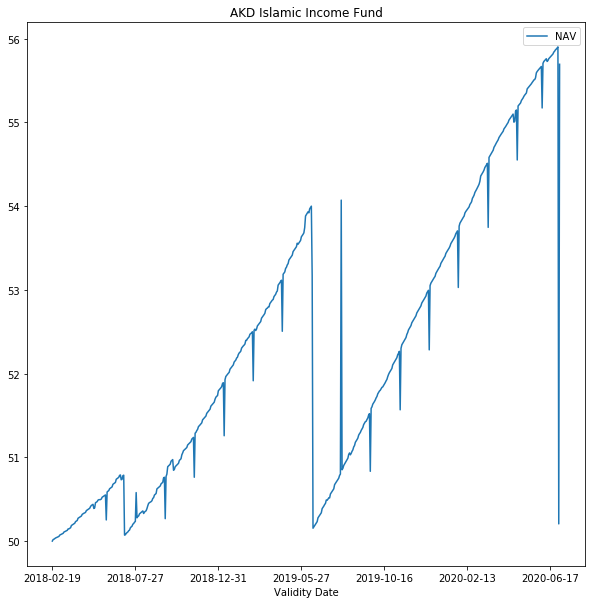

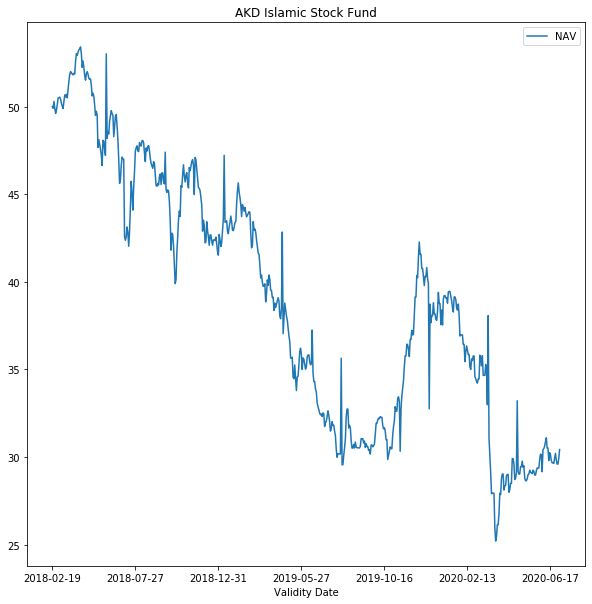

C:\Users\Arslan Shahid\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Arslan Shahid\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


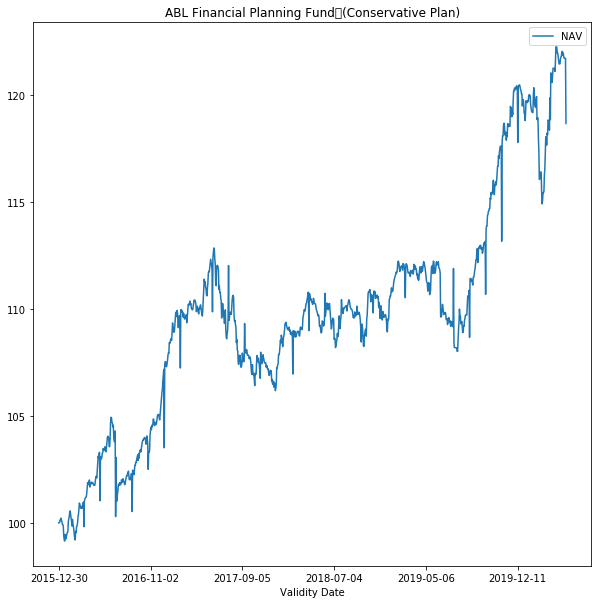

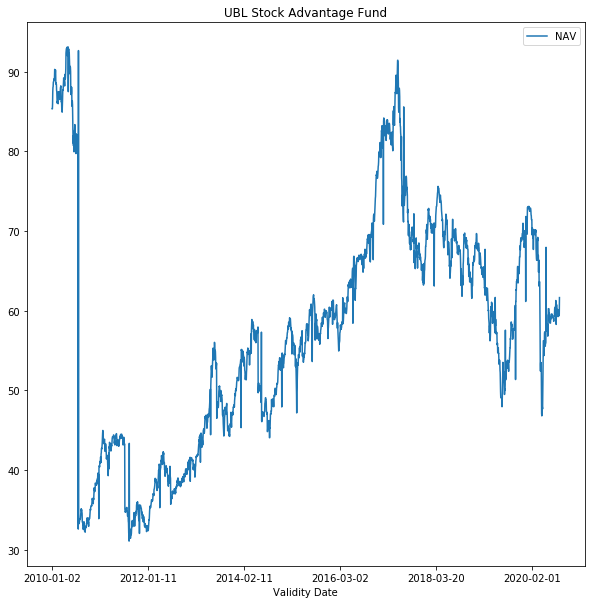

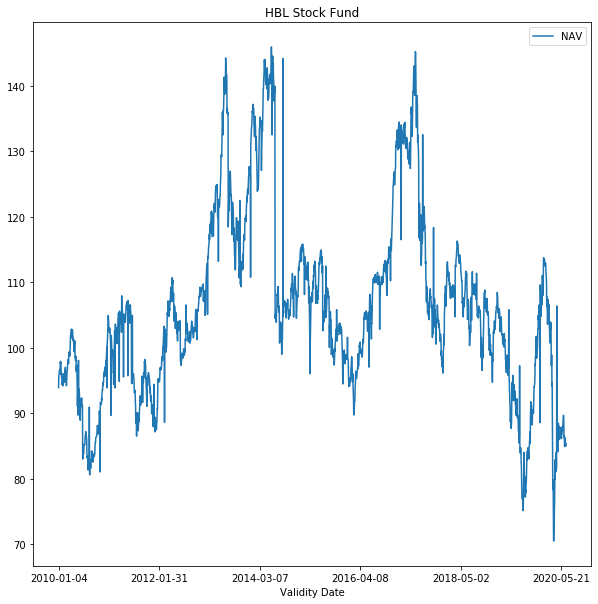

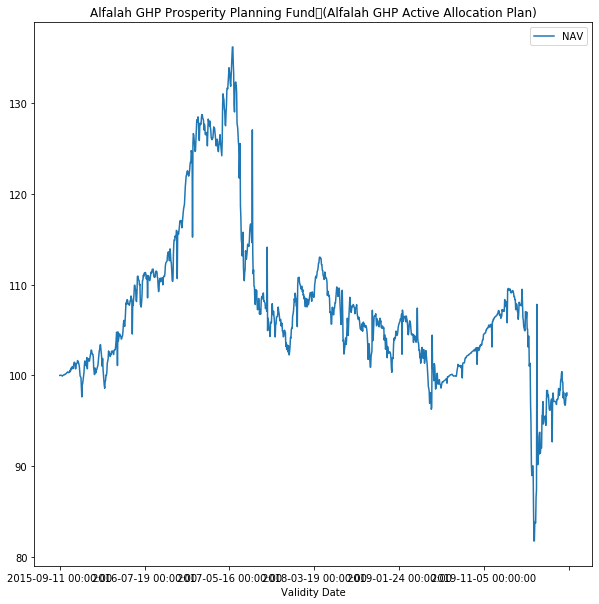

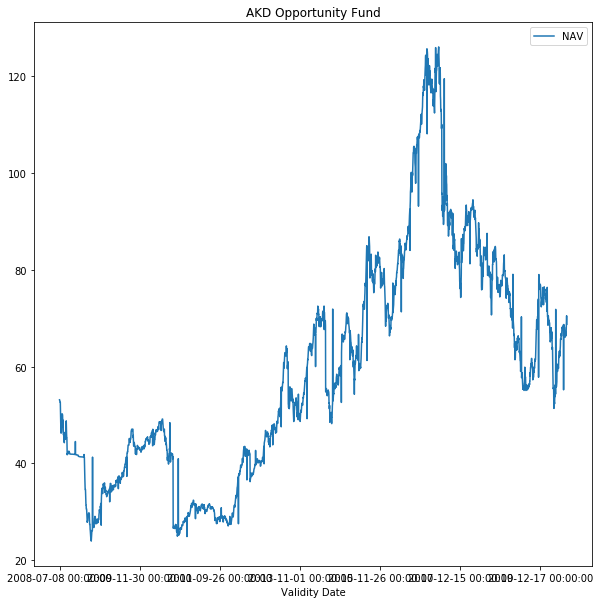

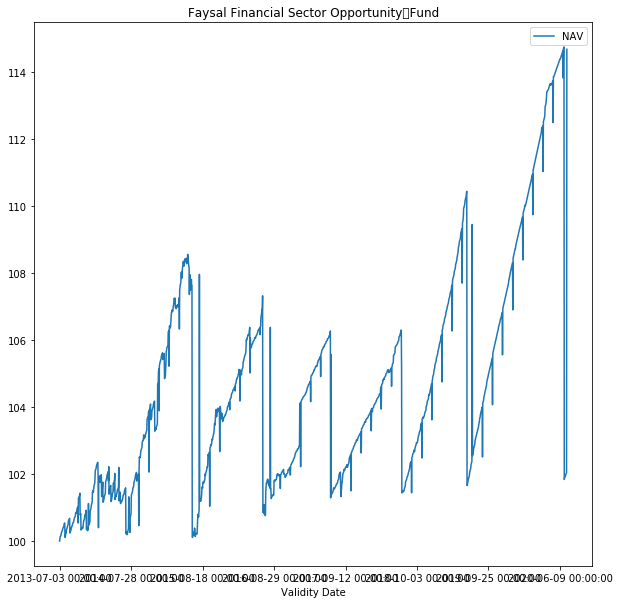

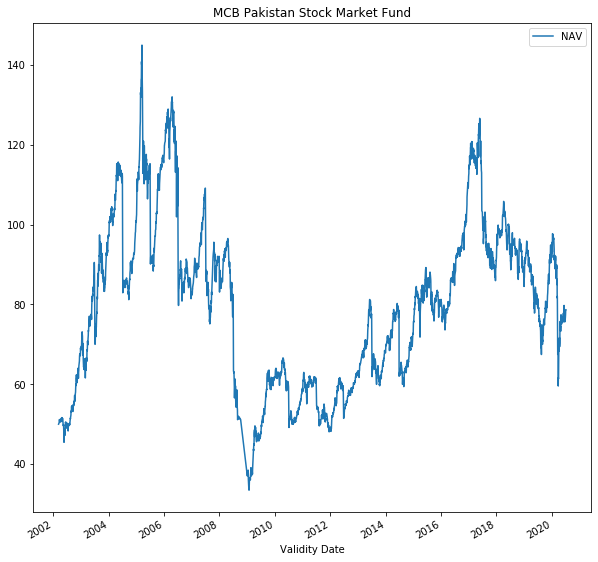

In [ ]:
for k in range(len(i)):
    price_data.get_group(i[k]).plot(x='Validity Date',y='NAV',figsize=(10,10),title=i[k])
    

plt.show()

In [ ]:
# display(price_data.get_group(i[5]))
# i[5]

In [ ]:
# price_data.get_group('HBL Stock Fund').plot(x='Validity Date',y='NAV',figsize=(10,10))
# plt.show()
display(df.groupby('Fund Name').head(1))

,Fund Name,Category,Inception Date,Class,Type,Offer,Repurchase,NAV,Validity Date,Front-end\rLoad %,Back-end\rLoad %,Contingent\rLoad %,Trustee Code,5MovingAvg
0,HBL Islamic Equity Fund,Shariah Compliant\rEquity,"May 29, 2014",-,-,0.0,0.0,100.000,2014-05-27,-,-,-,CDC,NaN
1456,Alfalah GHP Stock Fund,Equity,"Jul 15, 2008",-,-,143.83,140.32,140.320,2010-01-04,-,-,-,CDC,89.92816
4032,Alfalah GHP Islamic Stock Fund,Shariah Compliant\rEquity,"Sep 03, 2007",-,-,65.9,64.29,64.290,2010-01-07,-,-,-,CDC,88.58890
6503,AKD Islamic Income Fund,Shariah Compliant\rIncome,"Feb 20, 2018",-,-,50.0,50.0,50.000,2018-02-19,-,-,-,CDC,50.39626
7115,AKD Islamic Stock Fund,Shariah Compliant\rEquity,"Feb 20, 2018",-,-,50.0,50.0,50.000,2018-02-19,-,-,-,MCBFS,53.53670
7727,ABL Financial Planning Fund\r(Conservative Plan),Fund of Funds,"Dec 31, 2015",-,-,100.0,100.0,100.000,2015-12-30,-,-,-,MCBFS,43.90748
8833,UBL Stock Advantage Fund,Equity,"Aug 04, 2006",-,-,87.5,85.36,85.360,2010-01-02,-,-,-,CDC,113.83148
11479,HBL Stock Fund,Equity,"Aug 23, 2007",-,-,96.24,93.89,93.890,2010-01-04,-,-,-,CDC,66.81000
14003,Alfalah GHP Prosperity Planning Fund\r(Alfalah...,Fund of Funds,"Sep 12, 2015",-,-,100.0,100.0,100.000,2015-09-11 00:00:00,-,-,-,CDC,88.28488
15200,AKD Opportunity Fund,Equity,"Mar 31, 2006",-,-,54.75,53.1,53.124,2008-07-08 00:00:00,-,-,-,CDC,88.85650


In [ ]:
fundname = [x for x in df.groupby('Fund Name').head(1)['Fund Name']]
#rolling = df.groupby('Fund Name').rolling(5,min_periods=1)['NAV'].mean().reset_index(drop=True)
# = df.groupby('Fund Name').rolling(30,min_periods=1)['NAV'].mean().reset_index(drop=True)
rolling =[]
for fund in fundname:
    temp = df[df['Fund Name']== fund]
    roll = temp['NAV'].rolling(5,min_periods=1).mean().to_numpy()
    rolling.append(roll)
display(rolling[0])
df['5MovingAvg'] = [j for i in rolling for j in i]


array([100.        , 100.02345   , 100.01916667, ...,  76.78818   ,
        76.89266   ,  77.3539    ])

In [ ]:
rolling =[]
for fund in fundname:
    temp = df[df['Fund Name']== fund]
    roll = temp['NAV'].rolling(30,min_periods=1).mean().to_numpy()
    rolling.append(roll)
display(rolling[0])
df['30MovingAvg'] = [j for i in rolling for j in i]

array([100.        , 100.02345   , 100.01916667, ...,  77.21311667,
        77.26165667,  77.35691333])

In [ ]:
#df = df.drop(['5MovingAvg','30MovingAvg'],axis =1)

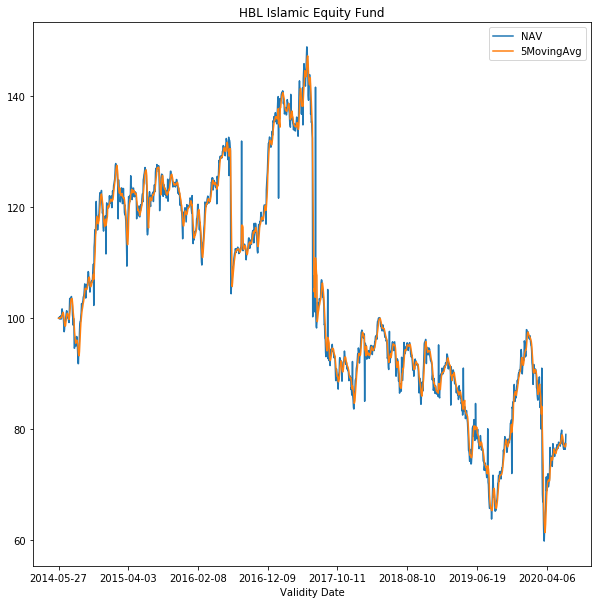

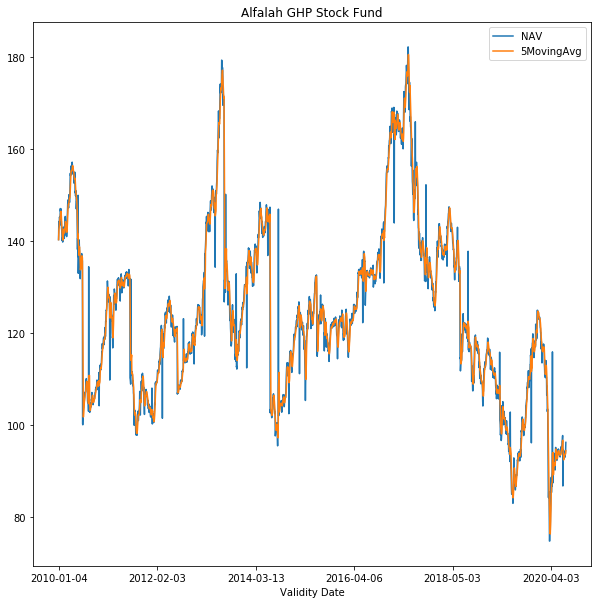

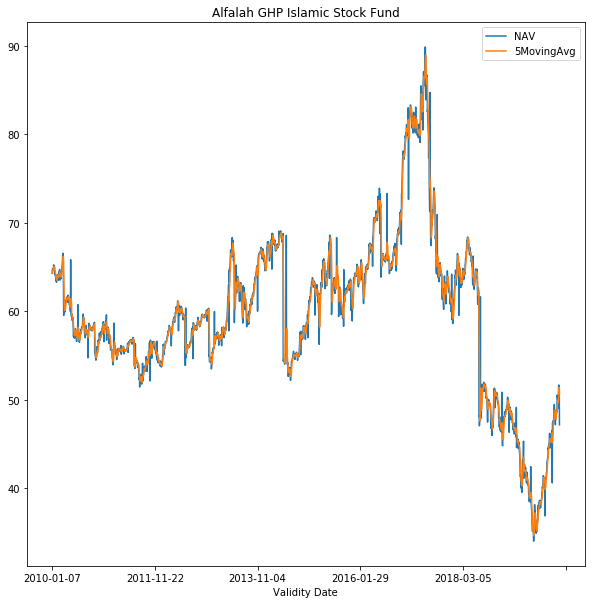

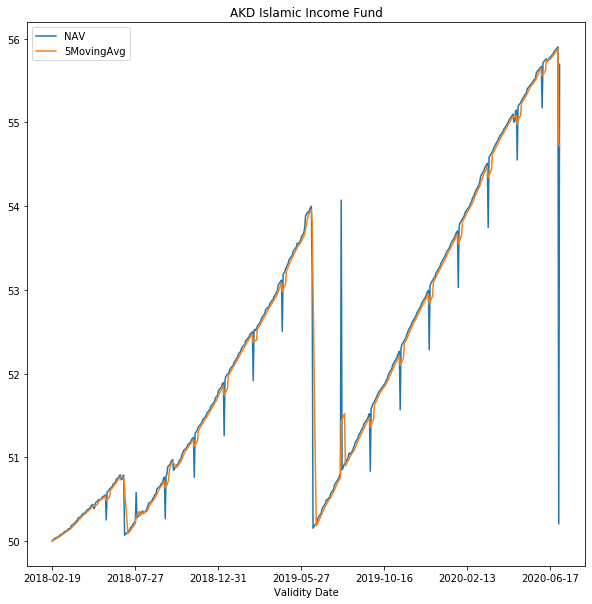

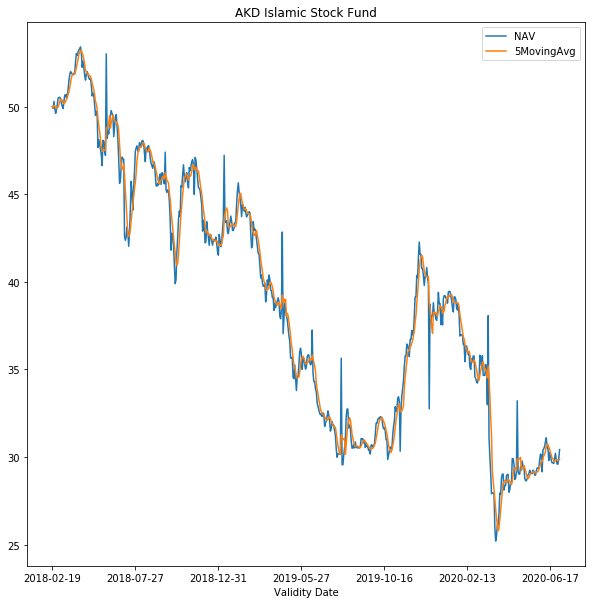

C:\Users\Arslan Shahid\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Arslan Shahid\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


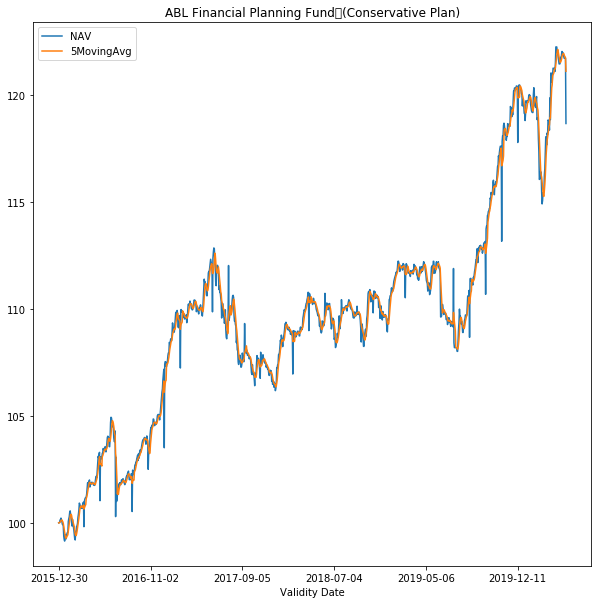

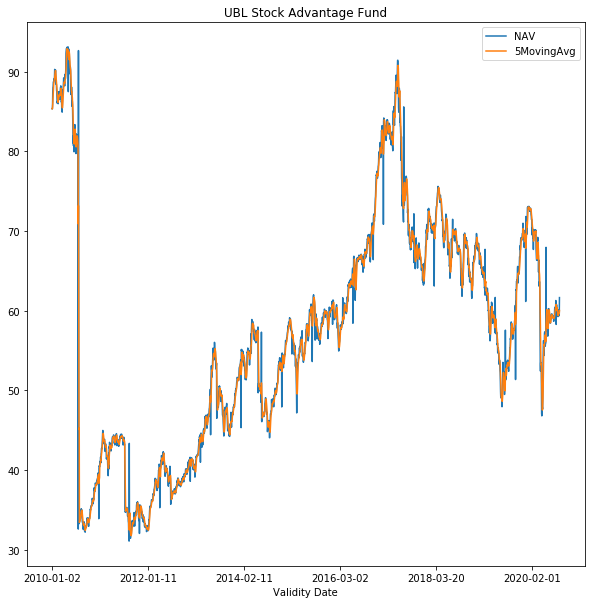

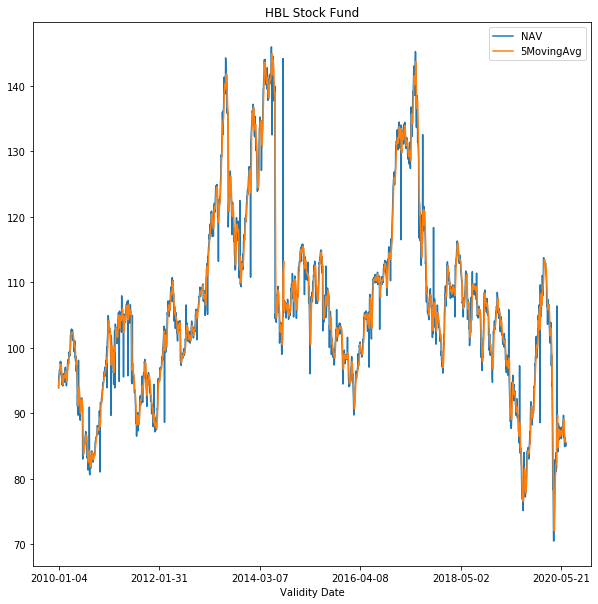

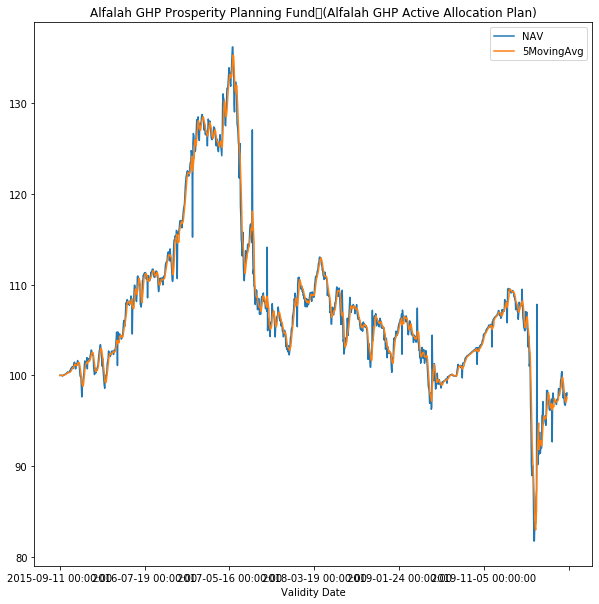

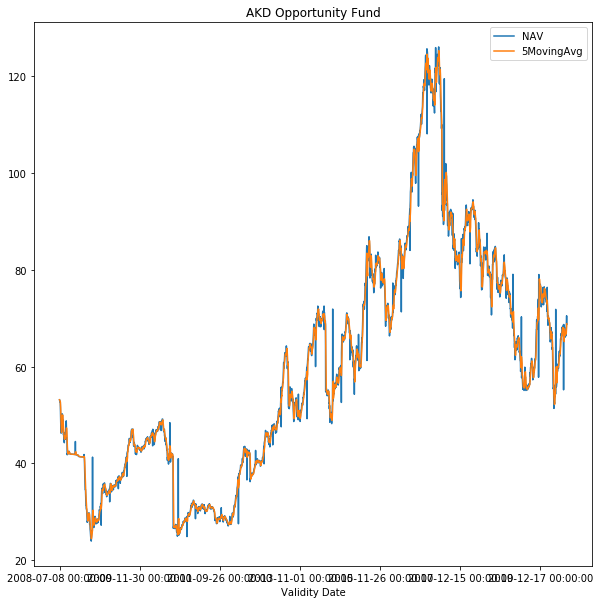

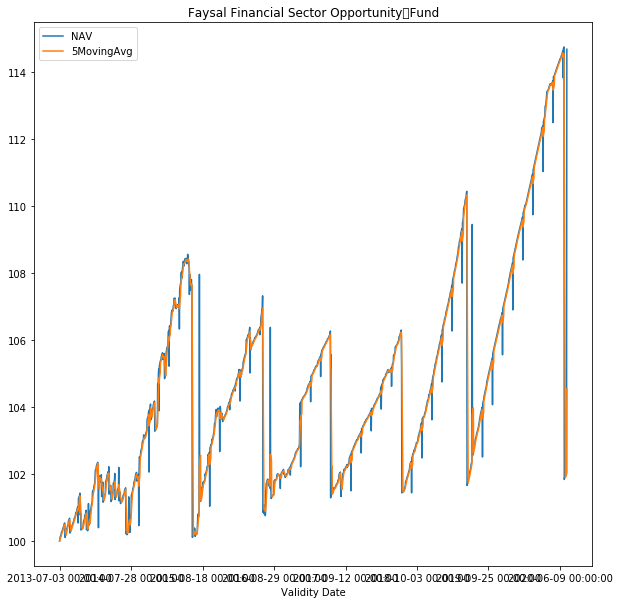

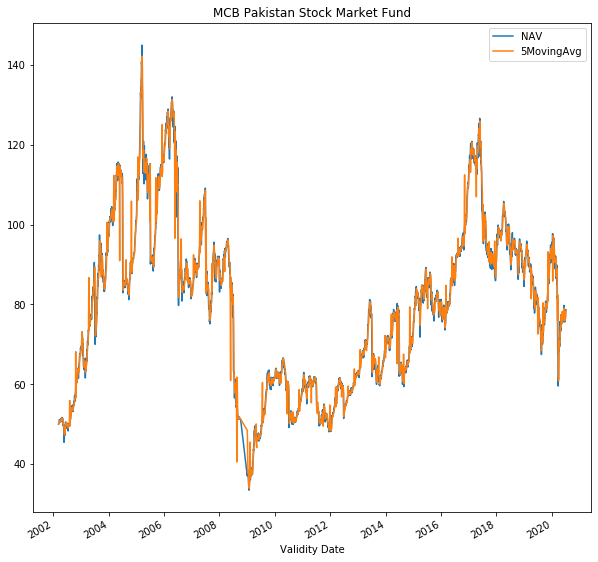

In [ ]:
for k in range(len(i)):
    df.groupby('Fund Name').get_group(i[k]).plot(x='Validity Date',y=['NAV','5MovingAvg'],figsize=(10,10),title=i[k])

In [2]:
from google.colab import drive




#drive.flush_and_unmount()
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
df= pd.read_csv('/content/drive/My Drive/Fund_data2.csv')

In [6]:
#df.drop(['5MovingAVg','30MovingAVg'],axis=1)

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import keras
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [6]:
df

,Fund Name,Category,Inception Date,Class,Type,Offer,Repurchase,NAV,Validity Date,Front-end\rLoad %,Back-end\rLoad %,Contingent\rLoad %,Trustee Code
0,HBL Islamic Equity Fund,Shariah Compliant\rEquity,"May 29, 2014",-,-,0.0,0.0,100.0000,2014-05-27,-,-,-,CDC
1,HBL Islamic Equity Fund,Shariah Compliant\rEquity,"May 29, 2014",-,-,103.0483,100.0469,100.0469,2014-05-29,-,-,-,CDC
2,HBL Islamic Equity Fund,Shariah Compliant\rEquity,"May 29, 2014",-,-,103.0109,100.0106,100.0106,2014-05-30,-,-,-,CDC
3,HBL Islamic Equity Fund,Shariah Compliant\rEquity,"May 29, 2014",-,-,103.2838,100.2755,100.2755,2014-06-02,-,-,-,CDC
4,HBL Islamic Equity Fund,Shariah Compliant\rEquity,"May 29, 2014",-,-,102.8178,99.8231,99.8231,2014-06-03,-,-,-,CDC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24558,MCB Pakistan Stock Market Fund,Equity,"Mar 11, 2002",-,-,81.059,78.4012,78.4012,"Jul 01, 2020",3.0,3.0,-,CDC
24559,MCB Pakistan Stock Market Fund,Equity,"Mar 11, 2002",-,-,81.2846,78.6194,78.6194,"Jul 02, 2020",3.0,3.0,-,CDC
24560,MCB Pakistan Stock Market Fund,Equity,"Mar 11, 2002",-,-,81.3749,78.7067,78.7067,"Jul 03, 2020",3.0,3.0,-,CDC
24561,MCB Pakistan Stock Market Fund,Equity,"Mar 11, 2002",-,-,81.3668,78.6989,78.6989,"Jul 04, 2020",3.0,3.0,-,CDC


In [16]:
trial = df[df['Fund Name']=='MCB Pakistan Stock Market Fund']

In [7]:



#display(data)


1019
Epoch 1/100
929/929 [==============================] - 9s 9ms/step - loss: 0.0485
Epoch 2/100
929/929 [==============================] - 7s 7ms/step - loss: 0.0145
Epoch 3/100
929/929 [==============================] - 7s 7ms/step - loss: 0.0121
Epoch 4/100
929/929 [==============================] - 7s 7ms/step - loss: 0.0110
Epoch 5/100
929/929 [==============================] - 7s 7ms/step - loss: 0.0138
Epoch 6/100
929/929 [==============================] - 7s 8ms/step - loss: 0.0104
Epoch 7/100
929/929 [==============================] - 7s 7ms/step - loss: 0.0107
Epoch 8/100
929/929 [==============================] - 7s 8ms/step - loss: 0.0093
Epoch 9/100
929/929 [==============================] - 7s 8ms/step - loss: 0.0102
Epoch 10/100
929/929 [==============================] - 7s 8ms/step - loss: 0.0116
Epoch 11/100
929/929 [==============================] - 7s 8ms/step - loss: 0.0081
Epoch 12/100
929/929 [==============================] - 7s 8ms/step - loss: 0.0075
Epoch 13

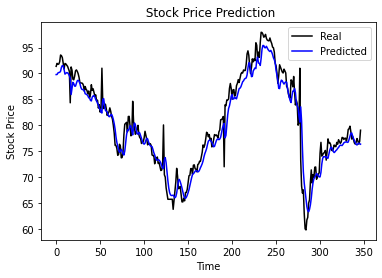

<Figure size 1440x1440 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1803
Epoch 1/100
1713/1713 [==============================] - 14s 8ms/step - loss: 0.0250
Epoch 2/100
1713/1713 [==============================] - 12s 7ms/step - loss: 0.0085
Epoch 3/100
1713/1713 [==============================] - 12s 7ms/step - loss: 0.0086
Epoch 4/100
1713/1713 [==============================] - 12s 7ms/step - loss: 0.0079
Epoch 5/100
1713/1713 [==============================] - 12s 7ms/step - loss: 0.0067
Epoch 6/100
1713/1713 [==============================] - 12s 7ms/step - loss: 0.0063
Epoch 7/100
1713/1713 [==============================] - 12s 7ms/step - loss: 0.0061
Epoch 8/100
1713/1713 [==============================] - 12s 7ms/step - loss: 0.0057
Epoch 9/100
1713/1713 [==============================] - 12s 7ms/step - loss: 0.0053
Epoch 10/100
1713/1713 [==============================] - 11s 7ms/step - loss: 0.0049
Epoch 11/100
1713/1713 [==============================] - 12s 7ms/step - loss: 0.0057
Epoch 12/100
1713/1713 [==============================] - 

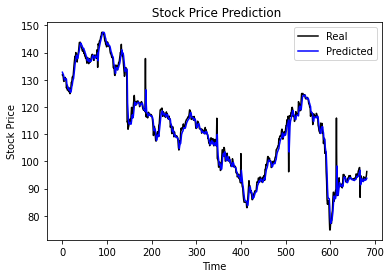

<Figure size 1440x1440 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1729
Epoch 1/100
1639/1639 [==============================] - 12s 7ms/step - loss: 0.0170
Epoch 2/100
1639/1639 [==============================] - 11s 7ms/step - loss: 0.0071
Epoch 3/100
1639/1639 [==============================] - 11s 7ms/step - loss: 0.0059
Epoch 4/100
1639/1639 [==============================] - 11s 7ms/step - loss: 0.0052
Epoch 5/100
1639/1639 [==============================] - 11s 7ms/step - loss: 0.0051
Epoch 6/100
1639/1639 [==============================] - 11s 7ms/step - loss: 0.0049
Epoch 7/100
1639/1639 [==============================] - 11s 7ms/step - loss: 0.0048
Epoch 8/100
1639/1639 [==============================] - 11s 7ms/step - loss: 0.0044
Epoch 9/100
1639/1639 [==============================] - 11s 7ms/step - loss: 0.0041
Epoch 10/100
1639/1639 [==============================] - 11s 7ms/step - loss: 0.0044
Epoch 11/100
1639/1639 [==============================] - 11s 7ms/step - loss: 0.0040
Epoch 12/100
1639/1639 [==============================] - 

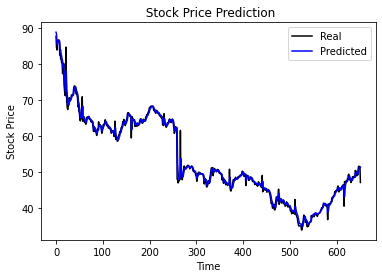

<Figure size 1440x1440 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

428
Epoch 1/100
338/338 [==============================] - 4s 13ms/step - loss: 0.0850
Epoch 2/100
338/338 [==============================] - 2s 7ms/step - loss: 0.0382
Epoch 3/100
338/338 [==============================] - 2s 7ms/step - loss: 0.0307
Epoch 4/100
338/338 [==============================] - 3s 7ms/step - loss: 0.0321
Epoch 5/100
338/338 [==============================] - 2s 7ms/step - loss: 0.0258
Epoch 6/100
338/338 [==============================] - 2s 7ms/step - loss: 0.0220
Epoch 7/100
338/338 [==============================] - 3s 8ms/step - loss: 0.0222
Epoch 8/100
338/338 [==============================] - 2s 7ms/step - loss: 0.0230
Epoch 9/100
338/338 [==============================] - 3s 8ms/step - loss: 0.0267
Epoch 10/100
338/338 [==============================] - 3s 7ms/step - loss: 0.0225
Epoch 11/100
338/338 [==============================] - 2s 7ms/step - loss: 0.0200
Epoch 12/100
338/338 [==============================] - 2s 7ms/step - loss: 0.0201
Epoch 13

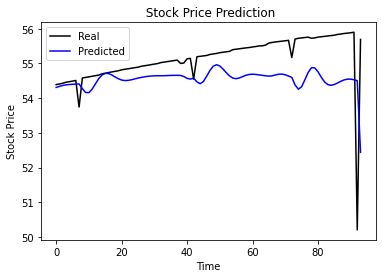

<Figure size 1440x1440 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

428
Epoch 1/100
338/338 [==============================] - 4s 12ms/step - loss: 0.0781
Epoch 2/100
338/338 [==============================] - 2s 7ms/step - loss: 0.0209
Epoch 3/100
338/338 [==============================] - 2s 7ms/step - loss: 0.0128
Epoch 4/100
338/338 [==============================] - 2s 7ms/step - loss: 0.0089
Epoch 5/100
338/338 [==============================] - 2s 7ms/step - loss: 0.0105
Epoch 6/100
338/338 [==============================] - 2s 7ms/step - loss: 0.0102
Epoch 7/100
338/338 [==============================] - 2s 7ms/step - loss: 0.0090
Epoch 8/100
338/338 [==============================] - 2s 7ms/step - loss: 0.0082
Epoch 9/100
338/338 [==============================] - 2s 7ms/step - loss: 0.0084
Epoch 10/100
338/338 [==============================] - 2s 7ms/step - loss: 0.0085
Epoch 11/100
338/338 [==============================] - 2s 7ms/step - loss: 0.0080
Epoch 12/100
338/338 [==============================] - 2s 7ms/step - loss: 0.0073
Epoch 13

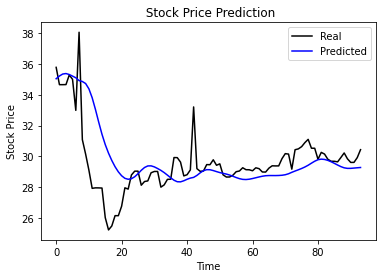

<Figure size 1440x1440 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

774
Epoch 1/100
684/684 [==============================] - 7s 10ms/step - loss: 0.0925
Epoch 2/100
684/684 [==============================] - 5s 7ms/step - loss: 0.0152
Epoch 3/100
684/684 [==============================] - 5s 7ms/step - loss: 0.0119
Epoch 4/100
684/684 [==============================] - 5s 7ms/step - loss: 0.0117
Epoch 5/100
684/684 [==============================] - 5s 7ms/step - loss: 0.0097
Epoch 6/100
684/684 [==============================] - 5s 7ms/step - loss: 0.0095
Epoch 7/100
684/684 [==============================] - 5s 7ms/step - loss: 0.0089
Epoch 8/100
684/684 [==============================] - 5s 7ms/step - loss: 0.0102
Epoch 9/100
684/684 [==============================] - 5s 7ms/step - loss: 0.0104
Epoch 10/100
684/684 [==============================] - 5s 7ms/step - loss: 0.0086
Epoch 11/100
684/684 [==============================] - 5s 7ms/step - loss: 0.0080
Epoch 12/100
684/684 [==============================] - 5s 7ms/step - loss: 0.0090
Epoch 13

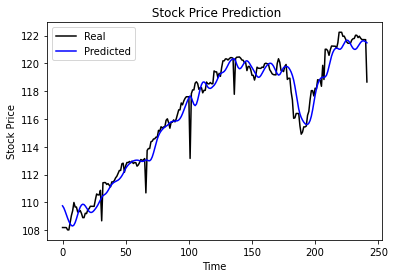

<Figure size 1440x1440 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1852
Epoch 1/100
1762/1762 [==============================] - 14s 8ms/step - loss: 0.0212
Epoch 2/100
1762/1762 [==============================] - 13s 7ms/step - loss: 0.0073
Epoch 3/100
1762/1762 [==============================] - 13s 7ms/step - loss: 0.0056
Epoch 4/100
1762/1762 [==============================] - 12s 7ms/step - loss: 0.0056
Epoch 5/100
1762/1762 [==============================] - 13s 7ms/step - loss: 0.0050
Epoch 6/100
1762/1762 [==============================] - 13s 7ms/step - loss: 0.0048
Epoch 7/100
1762/1762 [==============================] - 13s 7ms/step - loss: 0.0045
Epoch 8/100
1762/1762 [==============================] - 13s 7ms/step - loss: 0.0052
Epoch 9/100
1762/1762 [==============================] - 12s 7ms/step - loss: 0.0040
Epoch 10/100
1762/1762 [==============================] - 12s 7ms/step - loss: 0.0045
Epoch 11/100
1762/1762 [==============================] - 12s 7ms/step - loss: 0.0043
Epoch 12/100
1762/1762 [==============================] - 

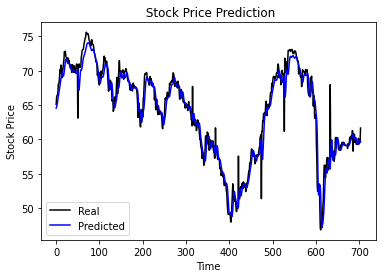

<Figure size 1440x1440 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1766
Epoch 1/100
1676/1676 [==============================] - 13s 8ms/step - loss: 0.0318
Epoch 2/100
1676/1676 [==============================] - 11s 6ms/step - loss: 0.0100
Epoch 3/100
1676/1676 [==============================] - 11s 7ms/step - loss: 0.0085
Epoch 4/100
1676/1676 [==============================] - 11s 7ms/step - loss: 0.0070
Epoch 5/100
1676/1676 [==============================] - 11s 6ms/step - loss: 0.0072
Epoch 6/100
1676/1676 [==============================] - 11s 6ms/step - loss: 0.0063
Epoch 7/100
1676/1676 [==============================] - 11s 6ms/step - loss: 0.0064
Epoch 8/100
1676/1676 [==============================] - 11s 6ms/step - loss: 0.0058
Epoch 9/100
1676/1676 [==============================] - 11s 6ms/step - loss: 0.0054
Epoch 10/100
1676/1676 [==============================] - 11s 6ms/step - loss: 0.0056
Epoch 11/100
1676/1676 [==============================] - 11s 6ms/step - loss: 0.0054
Epoch 12/100
1676/1676 [==============================] - 

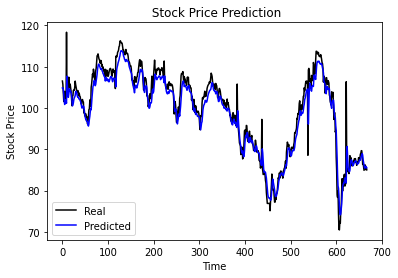

<Figure size 1440x1440 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

837
Epoch 1/100
747/747 [==============================] - 7s 9ms/step - loss: 0.0374
Epoch 2/100
747/747 [==============================] - 5s 7ms/step - loss: 0.0118
Epoch 3/100
747/747 [==============================] - 5s 7ms/step - loss: 0.0096
Epoch 4/100
747/747 [==============================] - 5s 7ms/step - loss: 0.0089
Epoch 5/100
747/747 [==============================] - 5s 7ms/step - loss: 0.0077
Epoch 6/100
747/747 [==============================] - 5s 7ms/step - loss: 0.0065
Epoch 7/100
747/747 [==============================] - 5s 7ms/step - loss: 0.0054
Epoch 8/100
747/747 [==============================] - 5s 7ms/step - loss: 0.0064
Epoch 9/100
747/747 [==============================] - 5s 7ms/step - loss: 0.0061
Epoch 10/100
747/747 [==============================] - 5s 7ms/step - loss: 0.0054
Epoch 11/100
747/747 [==============================] - 5s 7ms/step - loss: 0.0055
Epoch 12/100
747/747 [==============================] - 5s 7ms/step - loss: 0.0054
Epoch 13/

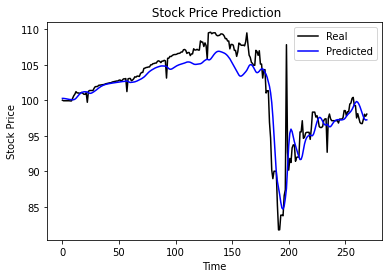

<Figure size 1440x1440 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2215
Epoch 1/100
2125/2125 [==============================] - 15s 7ms/step - loss: 0.0126
Epoch 2/100
2125/2125 [==============================] - 13s 6ms/step - loss: 0.0031
Epoch 3/100
2125/2125 [==============================] - 14s 7ms/step - loss: 0.0033
Epoch 4/100
2125/2125 [==============================] - 14s 7ms/step - loss: 0.0030
Epoch 5/100
2125/2125 [==============================] - 14s 6ms/step - loss: 0.0025
Epoch 6/100
2125/2125 [==============================] - 14s 6ms/step - loss: 0.0026
Epoch 7/100
2125/2125 [==============================] - 14s 6ms/step - loss: 0.0023
Epoch 8/100
2125/2125 [==============================] - 14s 7ms/step - loss: 0.0021
Epoch 9/100
2125/2125 [==============================] - 14s 7ms/step - loss: 0.0021
Epoch 10/100
2125/2125 [==============================] - 14s 7ms/step - loss: 0.0020
Epoch 11/100
2125/2125 [==============================] - 14s 6ms/step - loss: 0.0022
Epoch 12/100
2125/2125 [==============================] - 

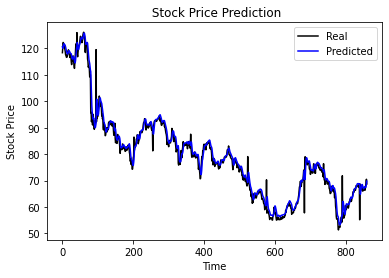

<Figure size 1440x1440 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1242
Epoch 1/100
1152/1152 [==============================] - 10s 8ms/step - loss: 0.0442
Epoch 2/100
1152/1152 [==============================] - 7s 6ms/step - loss: 0.0194
Epoch 3/100
1152/1152 [==============================] - 7s 6ms/step - loss: 0.0170
Epoch 4/100
1152/1152 [==============================] - 7s 6ms/step - loss: 0.0155
Epoch 5/100
1152/1152 [==============================] - 7s 6ms/step - loss: 0.0153
Epoch 6/100
1152/1152 [==============================] - 7s 6ms/step - loss: 0.0138
Epoch 7/100
1152/1152 [==============================] - 7s 6ms/step - loss: 0.0135
Epoch 8/100
1152/1152 [==============================] - 7s 6ms/step - loss: 0.0116
Epoch 9/100
1152/1152 [==============================] - 7s 6ms/step - loss: 0.0123
Epoch 10/100
1152/1152 [==============================] - 7s 6ms/step - loss: 0.0098
Epoch 11/100
1152/1152 [==============================] - 7s 6ms/step - loss: 0.0099
Epoch 12/100
1152/1152 [==============================] - 7s 6ms/ste

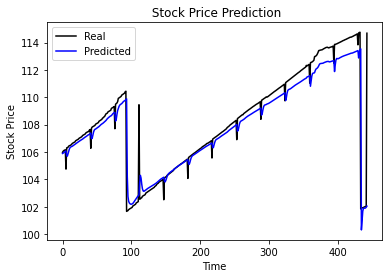

<Figure size 1440x1440 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3096
Epoch 1/100
3006/3006 [==============================] - 20s 7ms/step - loss: 0.0151
Epoch 2/100
3006/3006 [==============================] - 19s 6ms/step - loss: 0.0044
Epoch 3/100
3006/3006 [==============================] - 19s 6ms/step - loss: 0.0041
Epoch 4/100
3006/3006 [==============================] - 19s 6ms/step - loss: 0.0035
Epoch 5/100
3006/3006 [==============================] - 19s 6ms/step - loss: 0.0033
Epoch 6/100
3006/3006 [==============================] - 19s 6ms/step - loss: 0.0030
Epoch 7/100
3006/3006 [==============================] - 19s 6ms/step - loss: 0.0028
Epoch 8/100
3006/3006 [==============================] - 19s 6ms/step - loss: 0.0029
Epoch 9/100
3006/3006 [==============================] - 19s 6ms/step - loss: 0.0026
Epoch 10/100
3006/3006 [==============================] - 19s 6ms/step - loss: 0.0024
Epoch 11/100
3006/3006 [==============================] - 19s 6ms/step - loss: 0.0025
Epoch 12/100
3006/3006 [==============================] - 

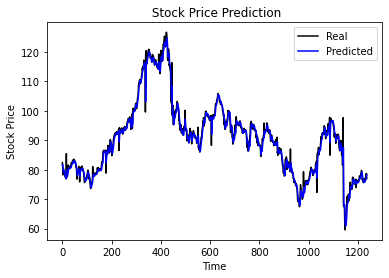

<Figure size 1440x1440 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
#for i in range(60, len(data[:,0])):
#     X_train.append(data[i-60:i, 0])
#     y_train.append(data[i, 0])
# X_train, y_train = np.array(X_train), np.array(y_train)
from google.colab import files

for name in df.groupby('Fund Name').head(1)['Fund Name']:
  #print(name)
  trial = df[df['Fund Name']== name]
  data = trial[['NAV']].to_numpy()
 # display(data)
  Scaler_train = MinMaxScaler(feature_range =(0,1))
  Scaler_test = MinMaxScaler(feature_range =(0,1))
  train_size =int(0.7* len(data))
  print(train_size)
  train = data[:train_size]
  train = Scaler_train.fit_transform(train)
  test = data[train_size:]
  test = Scaler_test.fit_transform(test)
  X_train = []
  y_train =[]
  X_test =[]
  y_test =[]
  for i in range(90, len(train[:,0])):
      X_train.append(train[i-90:i, 0])
      y_train.append(train[i, 0])
  X_train, y_train = np.array(X_train), np.array(y_train)
  for i in range(90, len(test[:,0])):
      X_test.append(test[i-90:i, 0])
      y_test.append(test[i, 0])
  X_test, y_test = np.array(X_test), np.array(y_test)
  #display(X_train.shape,y_train.shape)
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

  regressor = Sequential()

  regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
  regressor.add(Dropout(0.2))

  regressor.add(LSTM(units = 50, return_sequences = True))
  regressor.add(Dropout(0.2))

  regressor.add(LSTM(units = 50, return_sequences = True))
  regressor.add(Dropout(0.2))

  regressor.add(LSTM(units = 50))
  regressor.add(Dropout(0.2))

  regressor.add(Dense(units = 1))

  regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

  model = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


  real = Scaler_test.inverse_transform([y_test])
  predicted = Scaler_test.inverse_transform(regressor.predict(X_test))

  real.shape
  plt.plot(real[0], color = 'black', label = 'Real')
  plt.plot(predicted, color = 'blue', label = 'Predicted')
  plt.title(' Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('Stock Price')
  plt.legend()
  plt.figure(figsize=(20,20))
  plt.show()
  regressor.save('my_model_' + name +'.h5') 
  files.download('my_model_' + name +'.h5')
#display(X_train.shape,y_train.shape)
#display(test)

In [7]:
# i =0
# try:
#   models = [keras.models.load_model('/content/drive/My Drive/my_model_' + name +'.h5') for name in df.groupby('Fund Name').head(1)['Fund Name'] ]
#   i+=1
# except:
#display(i)
df = df[df['Fund Name'] != 'Faysal Financial Sector Opportunity\rFund']
names = [name for name in df.groupby('Fund Name').head(1)['Fund Name']]
names[5] = 'ABL Financial Planning Fund'
names[8] ='Alfalah GHP Prosperity Planning Fund'
display(names)
models = [keras.models.load_model('/content/drive/My Drive/my_model_' + name +'.h5') for name in names ]

['HBL Islamic Equity Fund',
 'Alfalah GHP Stock Fund',
 'Alfalah GHP Islamic Stock Fund',
 'AKD Islamic Income Fund',
 'AKD Islamic Stock Fund',
 'ABL Financial Planning Fund',
 'UBL Stock Advantage Fund',
 'HBL Stock Fund',
 'Alfalah GHP Prosperity Planning Fund',
 'AKD Opportunity Fund',
 'MCB Pakistan Stock Market Fund']

In [23]:
display(models)

array([[100.    ],
       [100.0469],
       [100.0106],
       ...,
       [ 76.3778],
       [ 76.8979],
       [ 79.0551]])

1019


In [26]:

#display(temp_input)

#display(temp_input)
future = pd.DataFrame()

In [27]:
from numpy import array
for t in range(len(models)):
  print(names[t])
  model = models[t]
  trial = df[df['Fund Name']== df.groupby('Fund Name').head(1)['Fund Name'].values[t]]
  data = trial[['NAV']].to_numpy()
  #display(data)
  #Scaler_train = MinMaxScaler(feature_range =(0,1))
  Scaler_test = MinMaxScaler(feature_range =(0,1))
  train_size =int(0.7* len(data))
  #print(train_size)

  test = data[train_size:]
  test = Scaler_test.fit_transform(test)

  X_test =[]
  y_test =[]


  for i in range(90, len(test[:,0])):
      X_test.append(test[i-90:i, 0])
      y_test.append(test[i, 0])
  X_test, y_test = np.array(X_test), np.array(y_test)
  #display(X_train.shape,y_train.shape)

  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
  x_input = y_test[-90:].reshape(-1,1)
  x_input.shape
#input\
#display(x_input)
# temp_input=list(x_input)
  temp_input= [x[0] for x in x_input]

  lst_output=[]
  n_steps=90
  i=0
  while(i<30):
      
      if(len(temp_input)>90):
          #print(temp_input)
          x_input=np.array(temp_input[1:])
        #  print("{} day input {}".format(i,x_input))
          x_input=x_input.reshape(1,-1)
          x_input = x_input.reshape((1, n_steps, 1))
          #print(x_input)
          yhat = model.predict(x_input, verbose=0)
        #  print("{} day output {}".format(i,yhat))
          temp_input.extend(yhat[0].tolist())
          temp_input=temp_input[1:]
          #print(temp_input)
          lst_output.extend(yhat.tolist())
          i=i+1
      else:
          x_input = x_input.reshape((1, n_steps,1))
          yhat = model.predict(x_input, verbose=0)
          #print(yhat[0])
          temp_input.extend(yhat[0].tolist())
        # print(len(temp_input))
          lst_output.extend(yhat.tolist())
          i=i+1
      
  lst_output = [x[0] for x in lst_output]
  lst_output = Scaler_test.inverse_transform(np.array(lst_output).reshape(-1,1))
  lst_output = [x[0] for x in lst_output]
  future[df.groupby('Fund Name').head(1)['Fund Name'].values[t]] = pd.Series(lst_output)
  
#print(lst_output)

HBL Islamic Equity Fund
Alfalah GHP Stock Fund
Alfalah GHP Islamic Stock Fund
AKD Islamic Income Fund
AKD Islamic Stock Fund
ABL Financial Planning Fund
UBL Stock Advantage Fund
HBL Stock Fund
Alfalah GHP Prosperity Planning Fund
AKD Opportunity Fund
MCB Pakistan Stock Market Fund


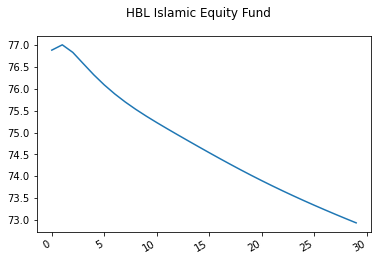

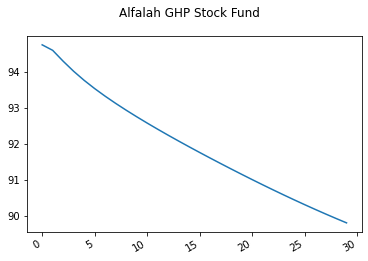

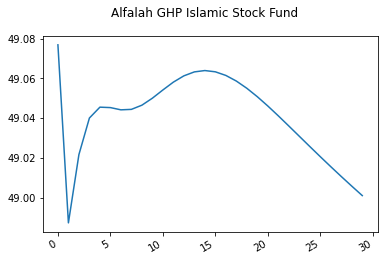

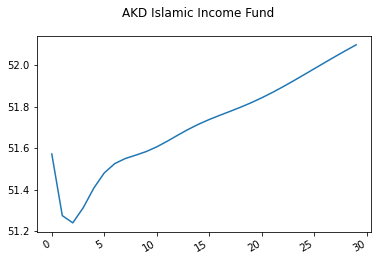

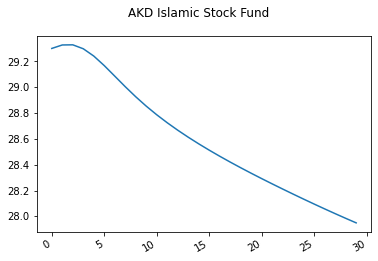

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


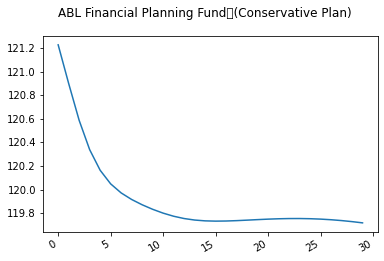

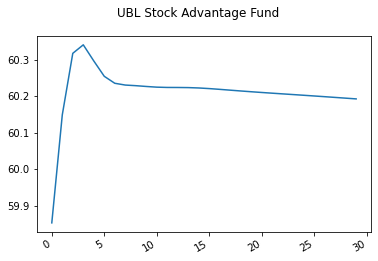

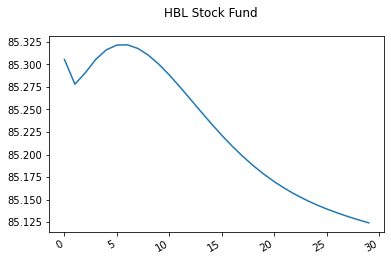

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


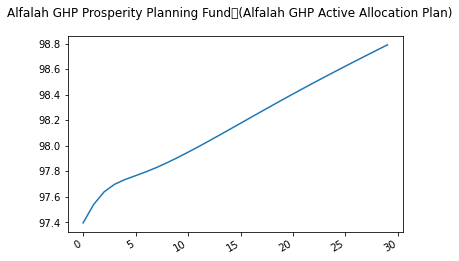

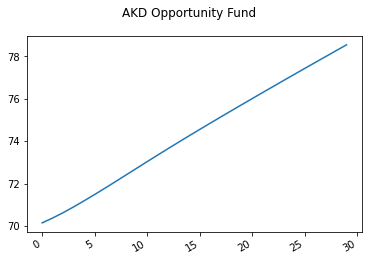

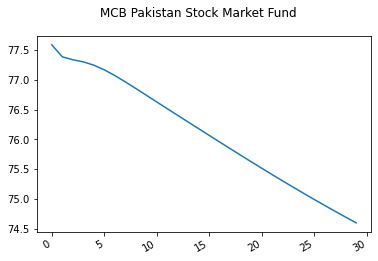

In [28]:
for column in future.columns:
  future[column].plot(subplots=True,title =column)
  plt.show()


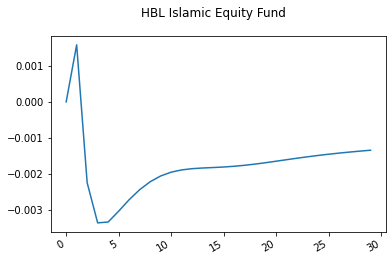

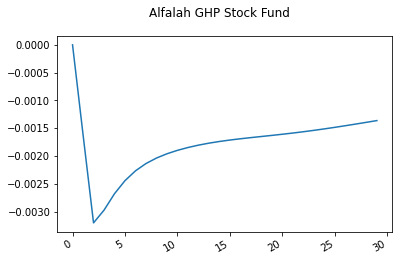

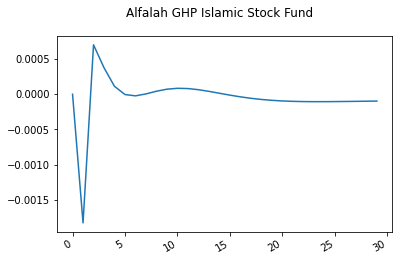

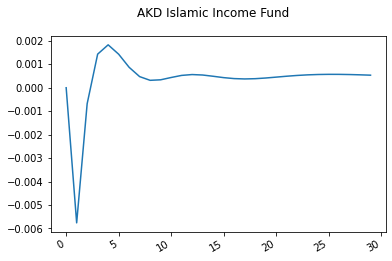

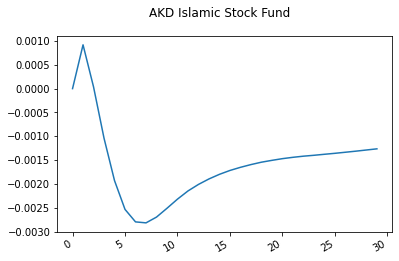

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


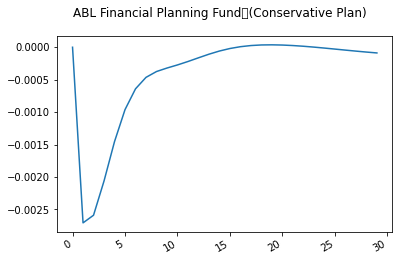

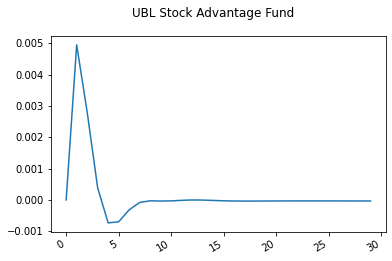

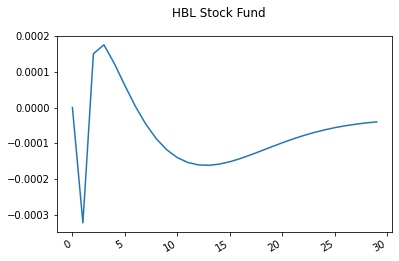

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


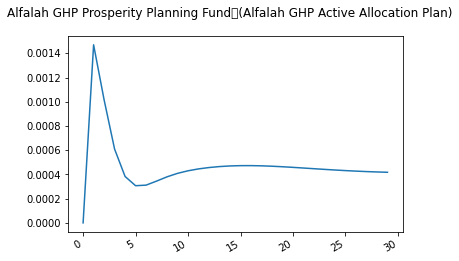

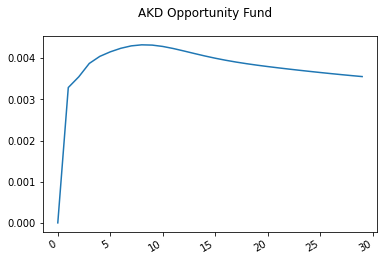

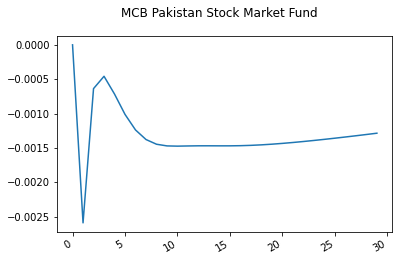

In [29]:
Return = pd.DataFrame()
for column in future.columns:
  Return[column] = future.pct_change()[column]
#Return.iloc[0] = (df.groupby('Fund Name').tail(1)['NAV'].values/future.iloc[0]) -1
Return.iloc[0] =[0 for i in range(len(future.columns))]
for column in future.columns:
  Return[column].plot(subplots=True,title =column)
  plt.show()

In [12]:
df.groupby('Fund Name').tail(1)['NAV'].values

array([ 79.0551,  96.2628,  47.1812,  55.6924,  30.4275, 118.6627,
        61.66  ,  85.0216,  98.051 ,  68.7253,  76.9785])

In [31]:
Return *=100

In [32]:
Return

,HBL Islamic Equity Fund,Alfalah GHP Stock Fund,Alfalah GHP Islamic Stock Fund,AKD Islamic Income Fund,AKD Islamic Stock Fund,ABL Financial Planning Fund\r(Conservative Plan),UBL Stock Advantage Fund,HBL Stock Fund,Alfalah GHP Prosperity Planning Fund\r(Alfalah GHP Active Allocation Plan),AKD Opportunity Fund,MCB Pakistan Stock Market Fund
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.158316,-0.161187,-0.182516,-0.575993,0.091843,-0.270619,0.494872,-0.032242,0.147104,0.329071,-0.259244
2,-0.224674,-0.319817,0.070111,-0.068086,0.003720,-0.258858,0.280570,0.015040,0.101677,0.355138,-0.063750
3,-0.336152,-0.296989,0.037523,0.143215,-0.103983,-0.206074,0.038671,0.017520,0.060942,0.387682,-0.045806
4,-0.333819,-0.267381,0.011154,0.182927,-0.192863,-0.145351,-0.073236,0.012264,0.038312,0.404818,-0.071705
5,-0.303754,-0.243943,-0.000437,0.143015,-0.253260,-0.096108,-0.069885,0.006127,0.030696,0.415866,-0.101315
6,-0.271859,-0.226309,-0.002299,0.087076,-0.279400,-0.064065,-0.031702,0.000329,0.031172,0.424487,-0.123960
7,-0.244090,-0.213218,0.000471,0.047383,-0.281452,-0.046409,-0.008122,-0.004694,0.034507,0.430378,-0.137894
8,-0.222016,-0.203354,0.004286,0.031624,-0.269352,-0.037414,-0.002837,-0.008764,0.038046,0.432929,-0.144751
9,-0.205980,-0.195684,0.007182,0.033806,-0.250835,-0.032028,-0.003605,-0.011848,0.040916,0.432250,-0.147190


In [ ]:
#test = Scaler_test.inverse_transform(y_test.reshape(-1,1))